In [15]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/tellecom.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.info()
# TotalCharges object? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# "TotalCharges" 컬럼에서 숫자 형태의 문자가 아닌 값은 결측치 처리한다.
# 1.
# for idx, data in enumerate(df['TotalCharges']): # enumerate() --> 반복문 돌릴 때 인덱스랑 값 동시에 뽑아주는 함수
#     try:
#         float(data.strip()) # 혹시 모를 공백 제거
#     except Exception as e:
#         print(f'행 : {idx}, 값 : {data}')
#         print(e)
# "TotalCharges" 컬럼에서 숫자형태의 문자가 아닌 값은 결측치 처리한다
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA) # 잘 바뀌는 지 확인 후 저장하기 --> na 있는 값 개수 더함

<Axes: >

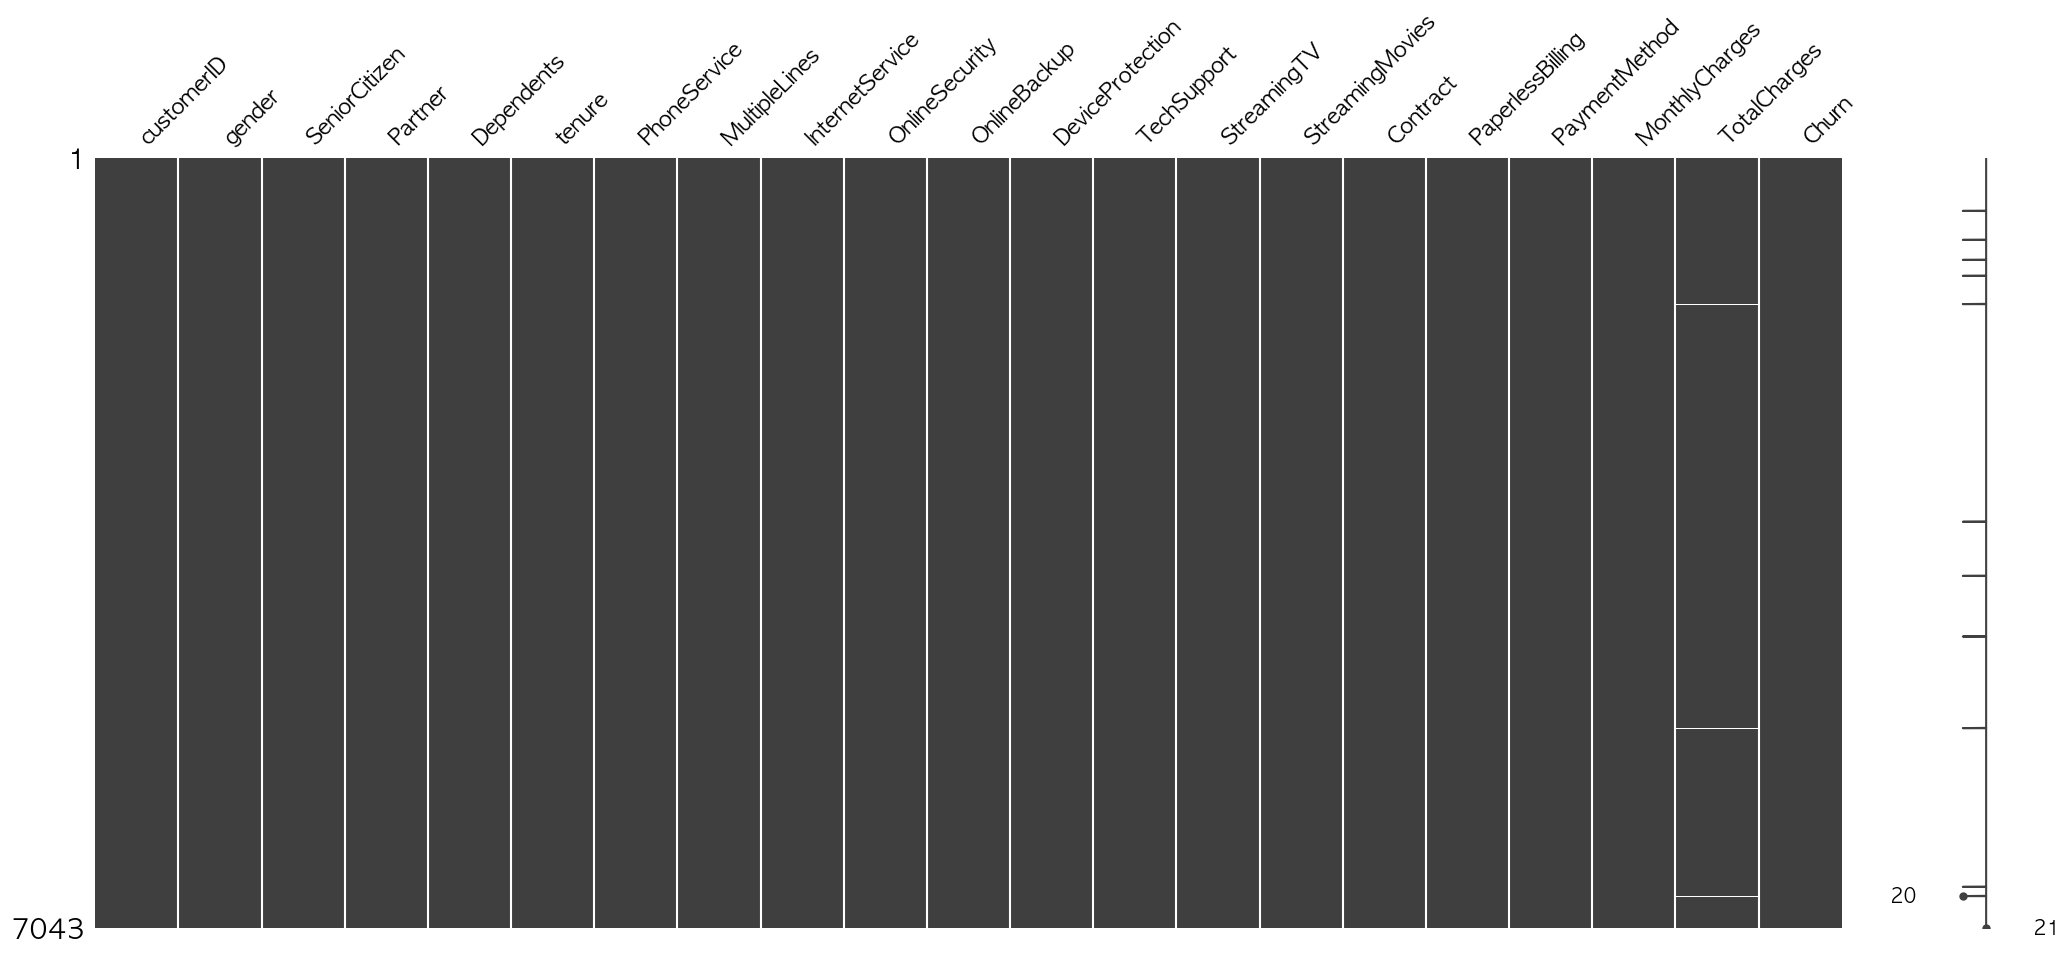

In [19]:
# 결측치 시각화
import missingno as msno
msno.matrix(df)

In [20]:
df.isna().mean() # Totalcharges 결측치 비율은 0.001563    --> 해당 결측치 row 데이터를 삭제
print(len(df))
df = df.dropna(subset=['TotalCharges'])
print(len(df))

7043
7032


In [21]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
# 이탈여부 Churn --> yes/no를 1/0으로 변경. --> 분석하기 용이함 (ex true/false, 남/여)
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No' : 0})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

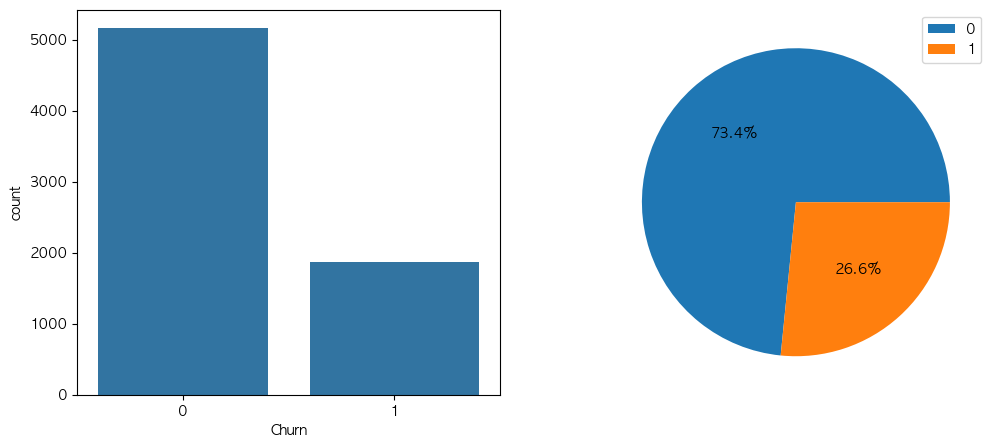

In [23]:
# 이탈고객의 현황
# countplot

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 설정 / # 마이너스 기호 깨짐 방지
mpl.rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data = df, x='Churn', ax=ax[0])
df['Churn'].value_counts()
ax[1].pie(x=df['Churn'].value_counts(), autopct = '%1.1f%%')
ax[1].legend(['0', '1'])
plt.show()

# 계약종류, 가입기간

In [24]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

<Axes: xlabel='TotalCharges_Rank', ylabel='count'>

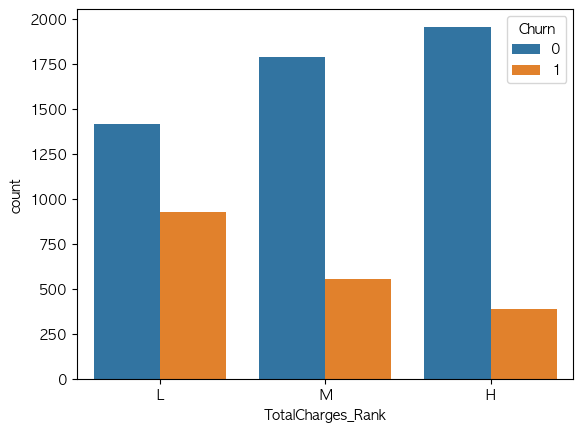

In [25]:
# 타깃이 되는 변수와 같이 영향을 미치는 다른 변수와의 관계
# 비용에 따른 가입유지여부 확인
# TotalCharges 3등분해서 (H, M, L)  --> 새로운 컬럼에 추가
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['TotalCharges_Rank']=pd.qcut(df['TotalCharges'], q=3, labels=['L', 'M', 'H'])
df.tail()
# 새로운컬럼별 가입여부에대한 groupby 를 해서 시각화 까지
sns.countplot(data=df, x='TotalCharges_Rank',hue='Churn')



<Axes: xlabel='Contract', ylabel='count'>

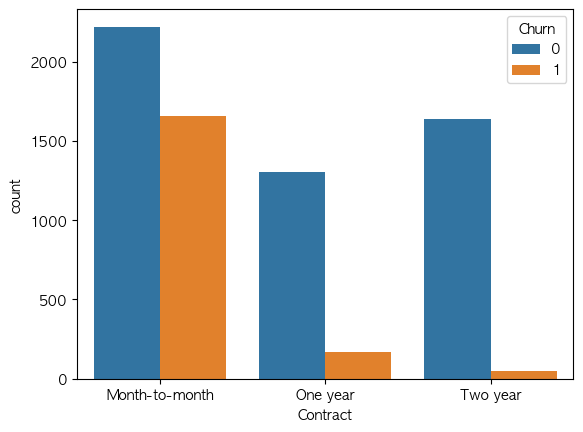

In [28]:
# 계약 종류(Contract)에 따른 고객 분포
sns.countplot(data=df, x='Contract', hue = 'Churn')
# 가입 기간(tenure) 분포
# 계약 종류에 따른 이탈률
# 가입 기간에 따른 이탈률
# 월 요금에 따른 이탈률
# 상관관계 분석 (Correlation Analysis)

<Axes: xlabel='Churn', ylabel='tenure'>

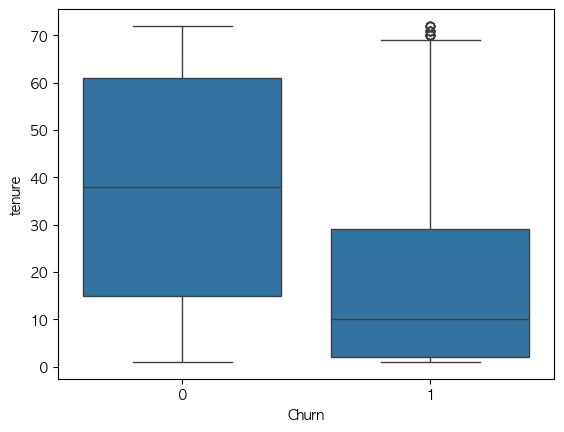

In [31]:
sns.boxplot(data=df, x='Churn', y='tenure')

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

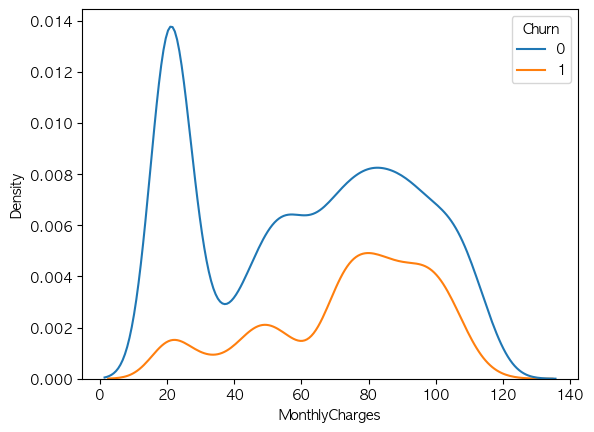

In [35]:
# 월 요금에 따른 이탈률
# df['MonthlyCharges']
sns.kdeplot(data=df, x='MonthlyCharges', hue = 'Churn')

In [ ]:
# 상관관계
df.info()
# df 수치형데이터... (문자열이 아닌) 들로만 구성을 해서 .corr() 적용


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         7032 non-null   object  
 1   gender             7032 non-null   object  
 2   SeniorCitizen      7032 non-null   int64   
 3   Partner            7032 non-null   object  
 4   Dependents         7032 non-null   object  
 5   tenure             7032 non-null   int64   
 6   PhoneService       7032 non-null   object  
 7   MultipleLines      7032 non-null   object  
 8   InternetService    7032 non-null   object  
 9   OnlineSecurity     7032 non-null   object  
 10  OnlineBackup       7032 non-null   object  
 11  DeviceProtection   7032 non-null   object  
 12  TechSupport        7032 non-null   object  
 13  StreamingTV        7032 non-null   object  
 14  StreamingMovies    7032 non-null   object  
 15  Contract           7032 non-null   object  
 16  PaperlessBi

In [39]:
df.describe().columns
df.loc[:, df.describe().columns].corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


In [ ]:
# 상관계수
# 'pearson', 'kendall', 'spearman'
# pearson : 변수들 사이에 선형관계
# spearman : 선형관계가 아닌 비선형관계, 이상치가 있을 때, 순위로 바꾸면 이상치의 영향이 크게 줄어든다.
    # 순서데이터 : 만족도 등과 같이 값 자체가 순서인 데이터
# kendall : 데이터 샘플이 적을 때 일치하는 쌍과 불일치하는 쌍의 개수

In [ ]:
df.describe(include='object')
remove_cols = ['customerID']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Rank
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,L
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,M


In [41]:
# 수치형 데이터 추출 
# 상관계수의 값을 통해 값이 높거나 낮은 변수들은 한 개만 선택(제외)
# 고객 아이디는 제거
preprocess_df = df.loc[:, df.describe().columns].drop(columns=['TotalCharges'])
preprocess_df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [42]:
X = preprocess_df.iloc[:, :-1]
Y = preprocess_df['Churn']

In [ ]:
import numpy as np
split_indexes = int(np.round(len(X)*0.8))
train_x = X[ : split_indexes]
test_x = X[split_indexes :]
train_y = Y[ : split_indexes]
test_y = Y[split_indexes :]

len(train_x), len(train_y), len(test_x), len(test_y)

(5626, 5626, 1406, 1406)